In [ ]:
"""
Trading Strategies for Stock Analysis

In this notebook, we apply various traditional trading strategies on a selected stock.
We use historical stock data (closing prices and volume) from Yahoo Finance, and then simulate trades 
using different strategies through the Trade_Simulator class.

Strategies implemented:
- Momentum
- Mean Reversion with Bollinger Bands
- Breakout
- Relative Strength Index (RSI) based
- Moving Average Convergence/Divergence (MACD)
- Volume Weighted Average Price (VWAP)
"""


In [15]:

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint
from datetime import datetime, timedelta
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#import the trade simulator from the repository.
from trade_simulator import Trade_Simulator
from trade_simulator_pair import Trade_Simulator_Pair

In [8]:
# Configuration
# Select the stock ticker (Walmart in this example)
stock = "WMT"

# Define the period for analysis
start_date = "2000-01-01"
end_date   = "2004-01-01"

# Download historical data (Close and Volume) from Yahoo Finance
data = yf.download(stock, start=start_date, end=end_date)[["Close", "Volume"]].dropna()

[*********************100%***********************]  1 of 1 completed


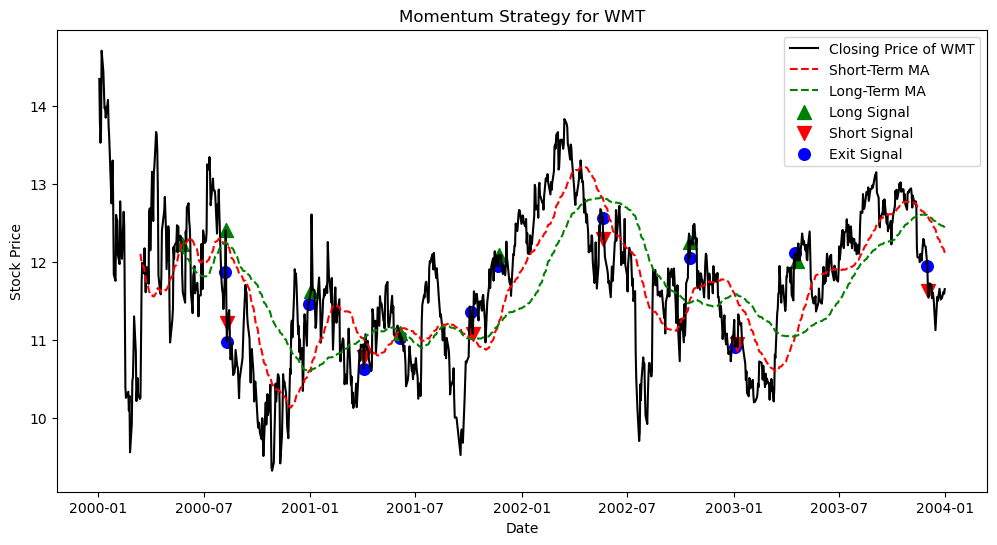

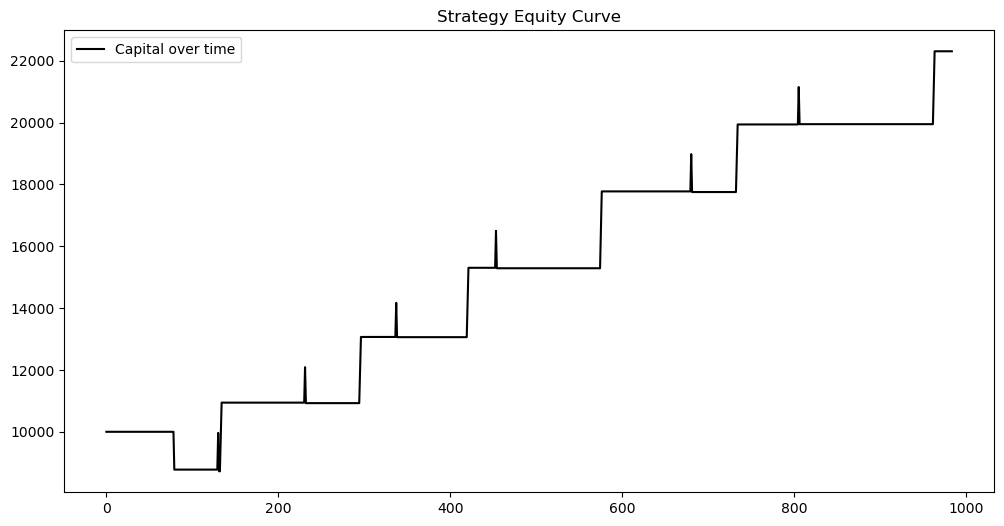

,Date,Type,Remaining Capital,Exit Price,Final Capital
0,2000-05-24,LONG,8777.183914,NaN,NaN
1,2000-08-07,EXIT,NaN,11.864855,9963.669395
2,2000-08-08,LONG,8723.374653,NaN,NaN
3,2000-08-10,EXIT,NaN,10.977012,9821.075821
4,2000-08-11,SHORT,10942.990780,NaN,NaN
5,2000-12-29,EXIT,NaN,11.461431,12089.133835
6,2001-01-02,LONG,10926.810551,NaN,NaN
7,2001-04-03,EXIT,NaN,10.628017,11989.612293
8,2001-04-04,SHORT,13067.105484,NaN,NaN
9,2001-06-04,EXIT,NaN,11.016924,14168.797874


In [9]:
# Each call to Trade_Simulator runs a specific trading strategy on the data.
# The function is expected to:
# - Simulate trades
# - Plot trade entries and portfolio value
# - Provide a trade log

# Momentum Trading Strategy:
# - Signal to short when the short-term moving average falls below the long-term moving average, 
#   and vice versa.
Trade_Simulator(stock, data, "momentum")

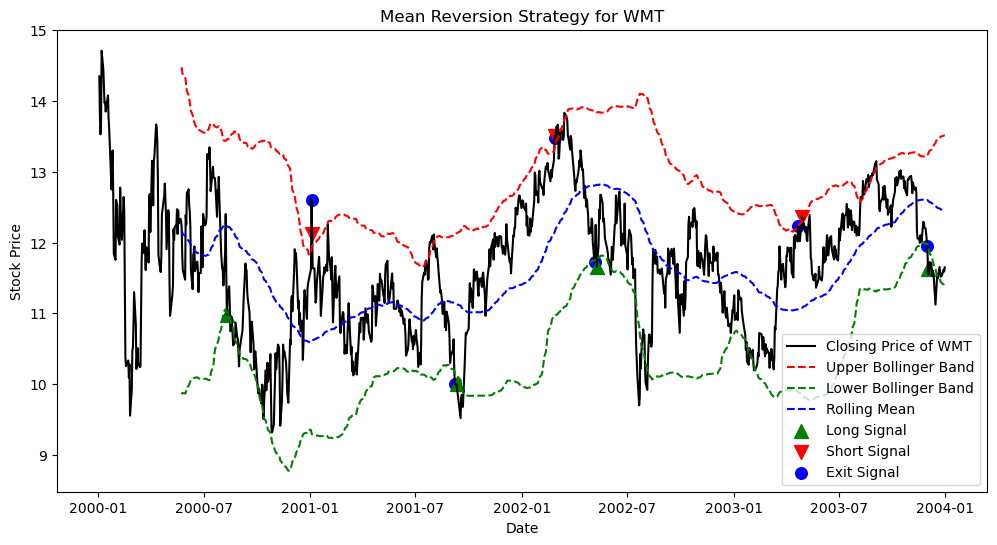

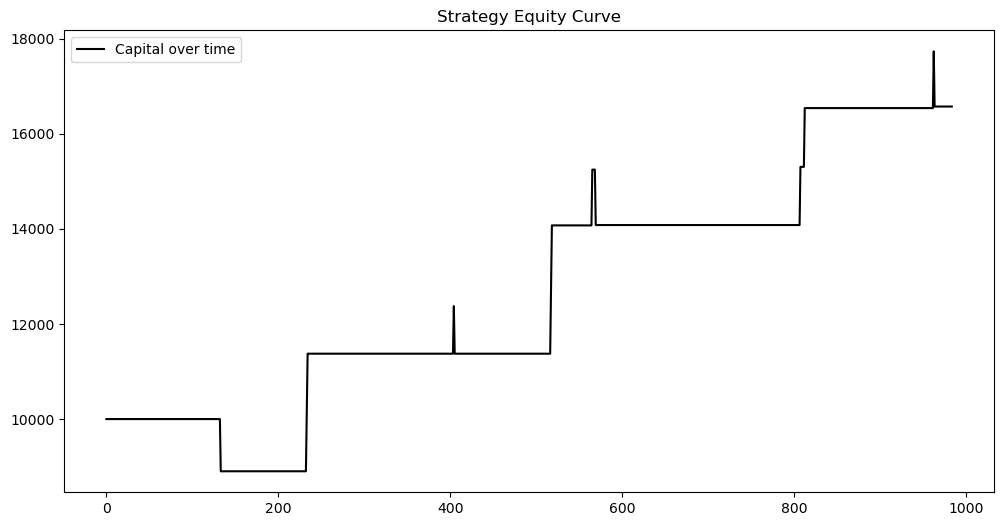

,Date,Type,Remaining Capital,Exit Price,Final Capital
0,2000-08-10,LONG,8902.298832,NaN,NaN
1,2001-01-03,EXIT,NaN,12.607571,10163.055897
2,2001-01-04,SHORT,11375.270653,NaN,NaN
3,2001-09-07,EXIT,NaN,10.000642,12375.334835
4,2001-09-10,LONG,11375.054455,NaN,NaN
5,2002-02-26,EXIT,NaN,13.474284,12722.482872
6,2002-02-27,SHORT,14073.166275,NaN,NaN
7,2002-05-06,EXIT,NaN,11.728455,15246.011734
8,2002-05-10,LONG,14080.334377,NaN,NaN
9,2003-04-22,EXIT,NaN,12.234438,15303.778172


In [10]:
# Mean Reversion Strategy with Bollinger Bands:
# - Use a 100-day rolling mean and bands to determine overbought/oversold conditions.
Trade_Simulator(stock, data, "mean_reversion")

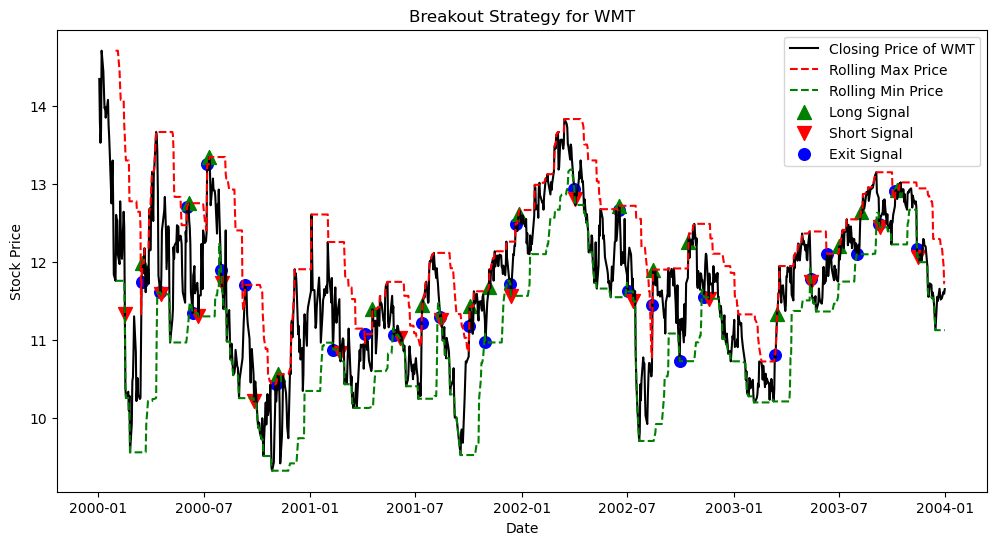

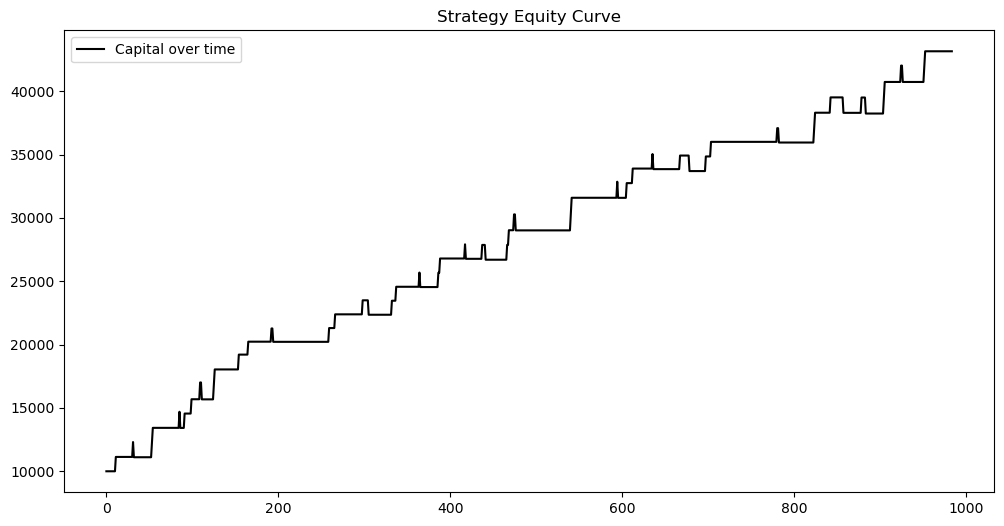

,Date,Type,Remaining Capital,Exit Price,Final Capital
0,2000-02-16,SHORT,11132.703209,NaN,NaN
1,2000-03-16,EXIT,NaN,11.744409,12307.144070
2,2000-03-17,LONG,11108.514786,NaN,NaN
3,2000-04-17,EXIT,NaN,11.610033,12269.518089
4,2000-04-18,SHORT,13427.833843,NaN,NaN
...,...,...,...,...,...
56,2003-09-10,SHORT,40733.346939,NaN,NaN
57,2003-10-07,EXIT,NaN,12.911749,42024.521828
58,2003-10-09,LONG,40732.032299,NaN,NaN
59,2003-11-13,EXIT,NaN,12.170801,41949.112415


In [11]:
# Breakout Strategy:
# - Go short if the price is the minimum of the past 20 days, and go long if it's the maximum.
Trade_Simulator(stock, data, "breakout")

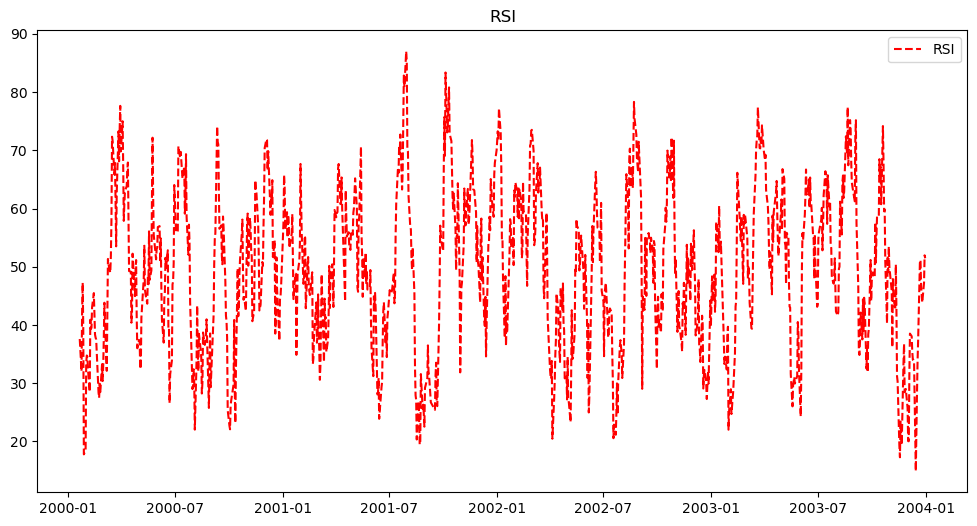

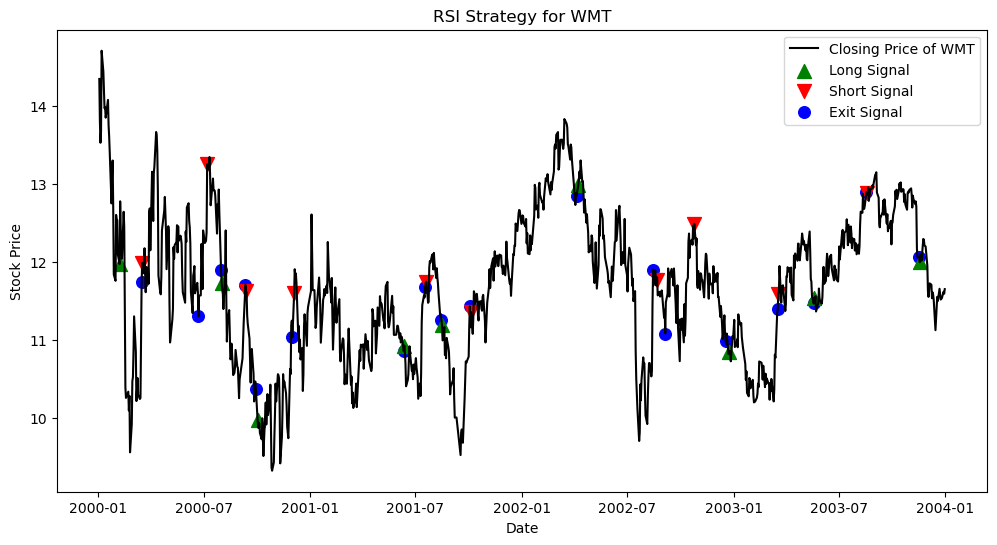

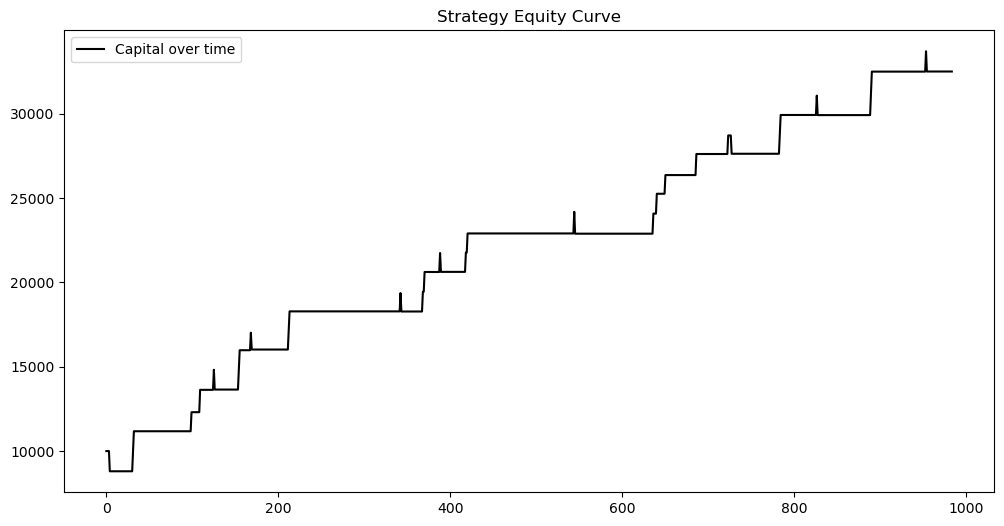

,Date,Type,Remaining Capital,Exit Price,Final Capital
0,2000-02-07,LONG,8802.877808,NaN,NaN
1,2000-03-16,EXIT,NaN,11.744409,9977.318668
2,2000-03-17,SHORT,11175.947952,NaN,NaN
3,2000-06-22,EXIT,NaN,11.299861,12305.934048
4,2000-07-07,SHORT,13630.977058,NaN,NaN
5,2000-07-31,EXIT,NaN,11.891757,14820.152760
6,2000-08-01,LONG,13647.119331,NaN,NaN
7,2000-09-11,EXIT,NaN,11.703429,14817.462254
8,2000-09-12,SHORT,15979.733658,NaN,NaN
9,2000-09-29,EXIT,NaN,10.369729,17016.706562


In [12]:
# RSI-based Strategy:
# - Go long if RSI < 30 (oversold) and short if RSI > 70 (overbought).
Trade_Simulator(stock, data, "rsi")

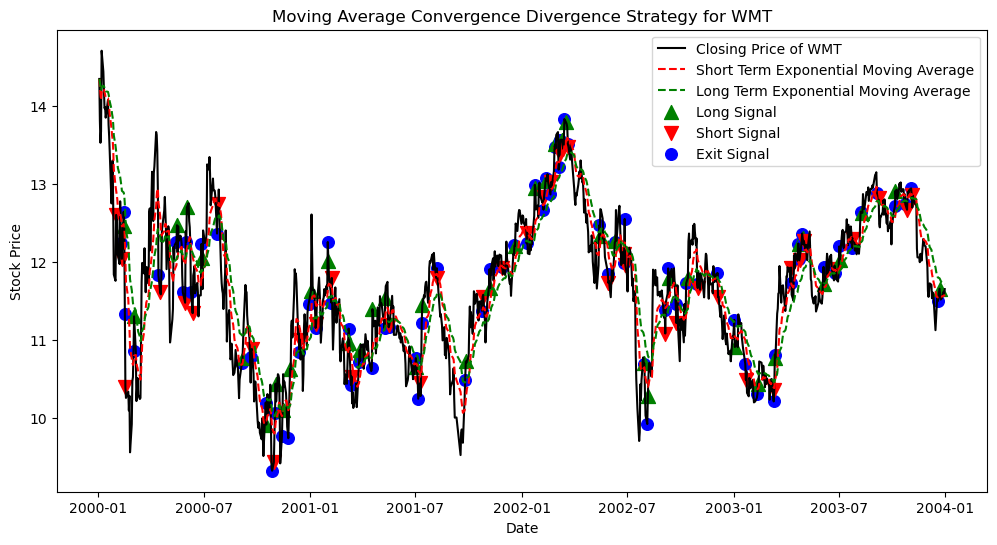

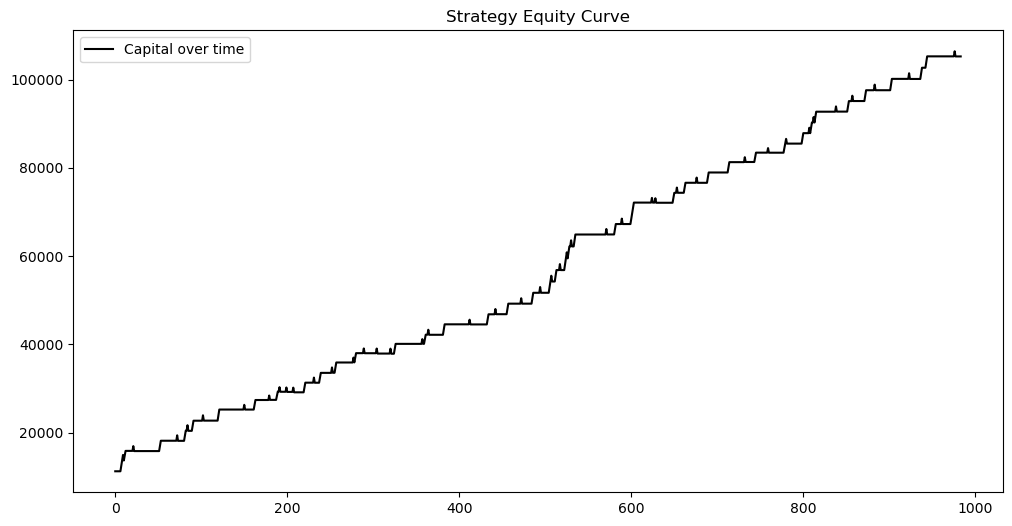

,Date,Type,Remaining Capital,Exit Price,Final Capital
0,2000-02-01,SHORT,11260.200214,NaN,NaN
1,2000-02-10,EXIT,NaN,12.239634,12484.163570
2,2000-02-11,SHORT,13687.996387,NaN,NaN
3,2000-02-14,EXIT,NaN,12.642261,14952.222443
4,2000-02-15,LONG,13706.785679,NaN,NaN
...,...,...,...,...,...
160,2003-10-27,SHORT,102663.032055,NaN,NaN
161,2003-11-03,EXIT,NaN,12.942435,103957.275581
162,2003-11-04,SHORT,105243.189144,NaN,NaN
163,2003-12-19,EXIT,NaN,11.496022,106392.791367


In [13]:
# MACD Strategy:
# - Trading signals based on the MACD (12, 26, 9) indicator.
Trade_Simulator(stock, data, "macd")

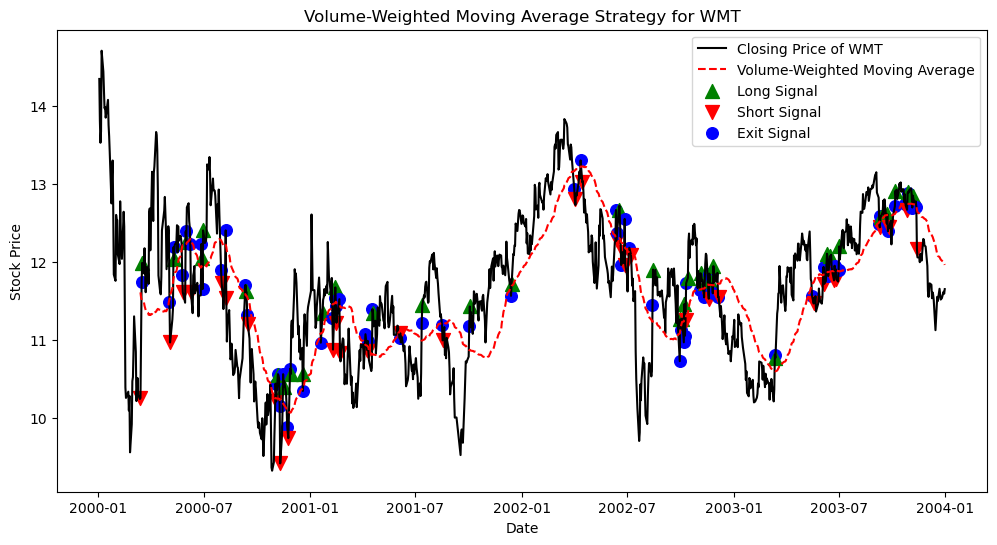

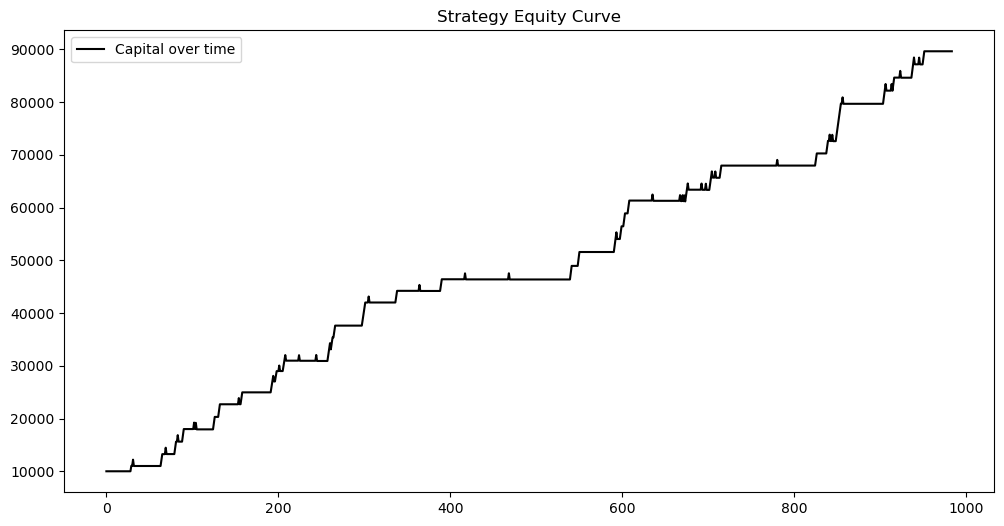

,Date,Type,Remaining Capital,Exit Price,Final Capital
0,2000-03-14,SHORT,11025.338078,NaN,NaN
1,2000-03-16,EXIT,NaN,11.744409,12199.778938
2,2000-03-17,LONG,11001.149654,NaN,NaN
3,2000-05-03,EXIT,NaN,11.489096,12150.059223
4,2000-05-04,SHORT,13246.562672,NaN,NaN
...,...,...,...,...,...
134,2003-10-29,LONG,87145.398426,NaN,NaN
135,2003-11-05,EXIT,NaN,12.696911,88415.089512
136,2003-11-06,LONG,87130.272198,NaN,NaN
137,2003-11-12,EXIT,NaN,12.705681,88400.840282


In [14]:
# VWAP Strategy:
# - Calculate a volume-weighted moving average (VWAP) over a 50-day rolling window.
Trade_Simulator(stock, data, "vwap")

In [17]:
Trade_Simulator_Pair(data["Close"],["OLS","BB"])

KeyError: 'Spread_OLS'